$$\frac{dSV(t)}{dt} = I_{\rm external}$$

$$\frac{dP_a(t)}{dt} = \frac{1}{C_a}\left(\frac{P_a(t) - P_v(t)}{R_{\rm TPR}(S)} - SV \cdot f_{\rm HR}(S)\right)$$

$$\frac{dP_v(t)}{dt} = \frac{1}{C_v} \left( -C_a \frac{dP_a(t)}{dt} + I_{\rm external} \right)$$

$$\frac{dS(t)}{dt} = \frac{1}{\tau_{\rm Baro}} \left( 1- \frac{1}{1 + e^{-k_{\rm width} \left(P_a(t) - P_{a_{\rm set}} \right)}} -S \right)$$

where

$$R_{\rm TPR} (S) = S(t) \left( R_{\rm TPR_{\rm Max}} - R_{\rm TPR_{\rm Min}}\right) + R_{\rm TPR_{\rm Min}} +R_{\rm TPR_{\rm Mod}} $$

$$ f_{\rm HR}(S) = S(t) \left(f_{\rm HR_{\rm Max}} - f_{\rm HR_{\rm Min}} \right) + f_{\rm HR_{\rm Min}}$$


* SV: cardiac stroke volume (amount of blood ejected by the heart)
* Pa: arterial blood pressure
* Pv: venous blood pressure
* S: autonomic barorelfex tone (reflex responsible for adapting pertubations in blood pressure, keeping homeostasis)

The ODE state: $x_t = \left( SV(t), P_a(t), P_v(t), S(t) \right)$ and observations $y_t = \left( P_a(t), P_v(t), f_{\rm HR} (t)\right) + \epsilon$ 

We wish gain a mechanistic understanding for system inputs:
$u = \left( I_{\rm external}, R_{\rm TPR_{\rm Mod}}\right)$. Note, $ I_{\rm external}  < 0$ implies a patient is loosing blood, while $R_{\rm TPR_{\rm Mod}} \ge 0$, implies spectic shoke (i.e., total peripheral resistance is getting low) resulting in 4 classes:
 * Healthy (both non-negative)
 * Hemorrhagic shock ($I_{\rm external}  < 0,R_{\rm TPR_{\rm Mod}} \ge 0 $)
 * Distributive shock ($I_{\rm external}  \ge 0, R_{\rm TPR_{\rm Mod}} < 0$)
 * Combined shock ($I_{\rm external}  < 0, R_{\rm TPR_{\rm Mod}} < 0$)


In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt
from data.cvs.cvs_data import load_data_config

### Generate Data

In [32]:
args = load_data_config()
print(args)
set_seed(args.seed)

make_dataset(args)

Munch({'output_dir': '/Users/paidamoyochapfuwa/Personal/structured_latent_ODEs/data/cvs/', 'seq_len': 86, 'data_size': 1000, 'delta_t': 1.0, 'noise_std': 0.05, 'seed': 12, 'num_epochs': 400, 'norm': 'zero_to_one', 'mini_batch_size': 128})
raw_data:  (1000, 86, 3)
latent_data:  (1000, 86, 4)
params_data:  1000
find_norm_params:  (900, 86, 3)
max_val:  [3.5212814  1.28347305 3.14691054] min_val:  [ 0.55656853 -0.02966171  0.74440984]


## Load data

In [33]:
obs_dict = torch.load(args.output_dir + 'processed_data.pkl')
train_params = torch.load(args.output_dir + 'train_params_data.pkl')
data_norm_params = torch.load(args.output_dir + 'data_norm_params.pkl')

In [34]:
print(obs_dict['train'].shape, train_params['i_ext'].shape, train_params['r_tpr_mod'].shape)

iext = train_params['i_ext']
rtpr = train_params['r_tpr_mod']


train_data = obs_dict['train']
#train_data = np.swapaxes(train_data, 2, 1)
print(train_data.shape)

print(data_norm_params)

(900, 86, 3) (900,) (900,)
(900, 86, 3)
{'mean': array([1.26053264, 0.86790564, 1.41845876]), 'std': array([0.77864926, 0.2724141 , 0.49734277]), 'max': array([3.5212814 , 1.28347305, 3.14691054]), 'min': array([ 0.55656853, -0.02966171,  0.74440984])}


In [35]:
from data.cvs import cvs_data
cvs_data.find_norm_params(obs_dict['train'])

find_norm_params:  (900, 86, 3)
max_val:  [3.5212814  1.28347305 3.14691054] min_val:  [ 0.55656853 -0.02966171  0.74440984]


{'mean': array([1.26053264, 0.86790564, 1.41845876]),
 'std': array([0.77864926, 0.2724141 , 0.49734277]),
 'max': array([3.5212814 , 1.28347305, 3.14691054]),
 'min': array([ 0.55656853, -0.02966171,  0.74440984])}

In [36]:
for idx in range(train_data.shape[2]):
    print("orig max_min: ",data_norm_params['max'][idx], data_norm_params['min'][idx])
    max_val = train_data[:,:, idx].max()
    min_val = train_data[:,:, idx].min()
    print(idx, "max_val: ", max_val, "min_val: ", min_val)
    train_data[:,:, idx] = (train_data[:,:, idx]  - min_val)/ (max_val - min_val)

print(train_data.min(), train_data.max())

orig max_min:  3.5212813985371514 0.5565685265929045
0 max_val:  3.5212813985371514 min_val:  0.5565685265929045
orig max_min:  1.2834730515820645 -0.029661711469034735
1 max_val:  1.2834730515820645 min_val:  -0.029661711469034735
orig max_min:  3.146910538990956 0.7444098434146311
2 max_val:  3.146910538990956 min_val:  0.7444098434146311
0.0 1.0


In [37]:
train_data = np.swapaxes(train_data, 2, 1)

['IR=-2,0', 'IR=-2,0', 'IR=-2,0', 'IR=0,0', 'IR=0,0', 'IR=-2,0', 'IR=0,0', 'IR=-2,0']


<Figure size 640x480 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

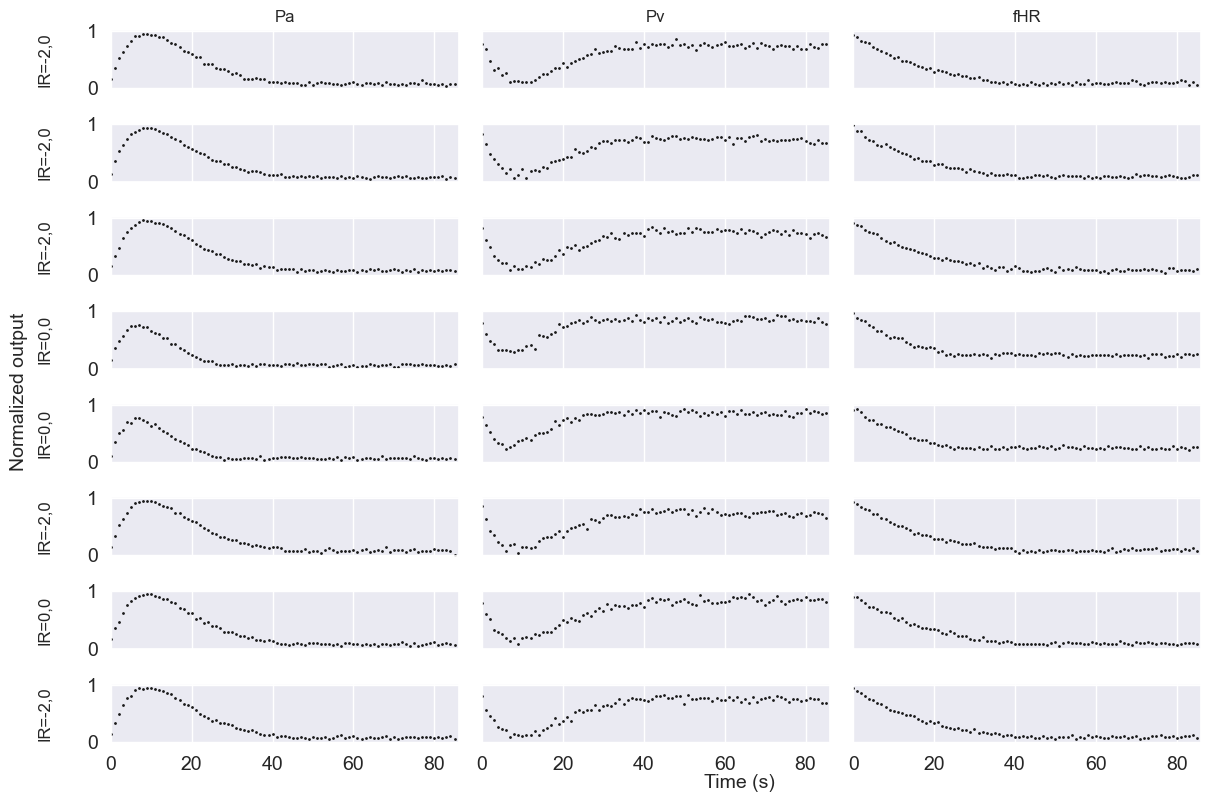

In [40]:
columns = np.arange(train_data.shape[1])
rows = np.arange(train_data.shape[0])
t = np.arange(0.0, stop=(args.seq_len) * args.delta_t, step=args.delta_t) 

colors = ['tab:gray', 'r', 'y', 'c']
fs = 14
# print(rows)
# selected_rows = random.sample(rows, subset)
plt.clf()
nplots = 8
rows = rows[0:nplots]

fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(12, 8))
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)

for r, c in combinations:
        # print("r: ", r, "c", c)
    loc = r
    empirical = train_data[loc, c, :]

    axs[r, c].plot(t, empirical, 'k.', markersize=2)
    axs[r, c].set_xlim(0.0, len(t) + 0.01)
    axs[r, c].set_ylim(-0.01, 1.01)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)

cols = ['Pa', 'Pv', 'fHR']
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

rows = ["IR={},{}".format(int(row[0]), int(row[1])) for row in zip(iext[0:nplots], rtpr[0:nplots])]
print(rows)
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, labelpad=25, fontsize=fs - 2)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
fig.text(0.6, 0, "Time (s)", ha="center", va="bottom", fontsize=fs)
#plt.ylabel("Normalized output", fontsize=fs)
#plt.xlabel("Time (h)", fontsize=fs)
fig.tight_layout()
plt.show()

In [41]:
mesh = np.array(np.meshgrid(np.unique(iext), np.unique(rtpr)))
combinations = mesh.T.reshape(-1, 2)
print(combinations)
for c in combinations:
    print(c[0], c[1])

[[-2.   0. ]
 [-2.   0.5]
 [ 0.   0. ]
 [ 0.   0.5]]
-2.0 0.0
-2.0 0.5
0.0 0.0
0.0 0.5


In [42]:
idx = np.where((np.logical_and(iext == 0, rtpr==0.5)))[0]
print(idx)
print(len(idx))

[  3   4   8   9  10  15  26  32  33  35  41  43  45  47  56  58  59  61
  65  71  77  83  85  95  97 104 106 108 111 113 114 115 116 117 122 126
 130 136 140 143 144 150 158 167 180 184 186 187 189 191 194 199 204 205
 212 213 218 224 227 235 237 245 248 252 255 256 269 273 277 278 280 285
 286 291 292 294 296 297 299 303 304 306 307 311 321 326 349 356 362 363
 365 370 376 379 380 384 386 394 395 398 399 411 421 422 427 428 436 437
 438 441 443 445 448 449 450 454 455 456 457 461 466 467 469 470 472 475
 476 480 485 494 499 501 502 510 513 518 521 522 523 525 528 536 537 538
 541 543 545 546 547 548 554 557 561 565 567 568 571 578 584 587 595 606
 608 612 617 620 626 627 628 629 632 634 637 639 640 644 650 663 670 673
 676 677 679 688 689 692 697 700 701 703 705 717 723 726 728 730 732 747
 752 765 767 771 777 784 787 788 798 804 811 812 813 818 821 822 823 824
 828 829 833 841 843 845 851 853 854 857 858 862 865 874 879 888 893 896
 899]
235


['IR=0.0,0.5', 'IR=0.0,0.5', 'IR=0.0,0.5', 'IR=0.0,0.5', 'IR=0.0,0.5']


<Figure size 640x480 with 0 Axes>

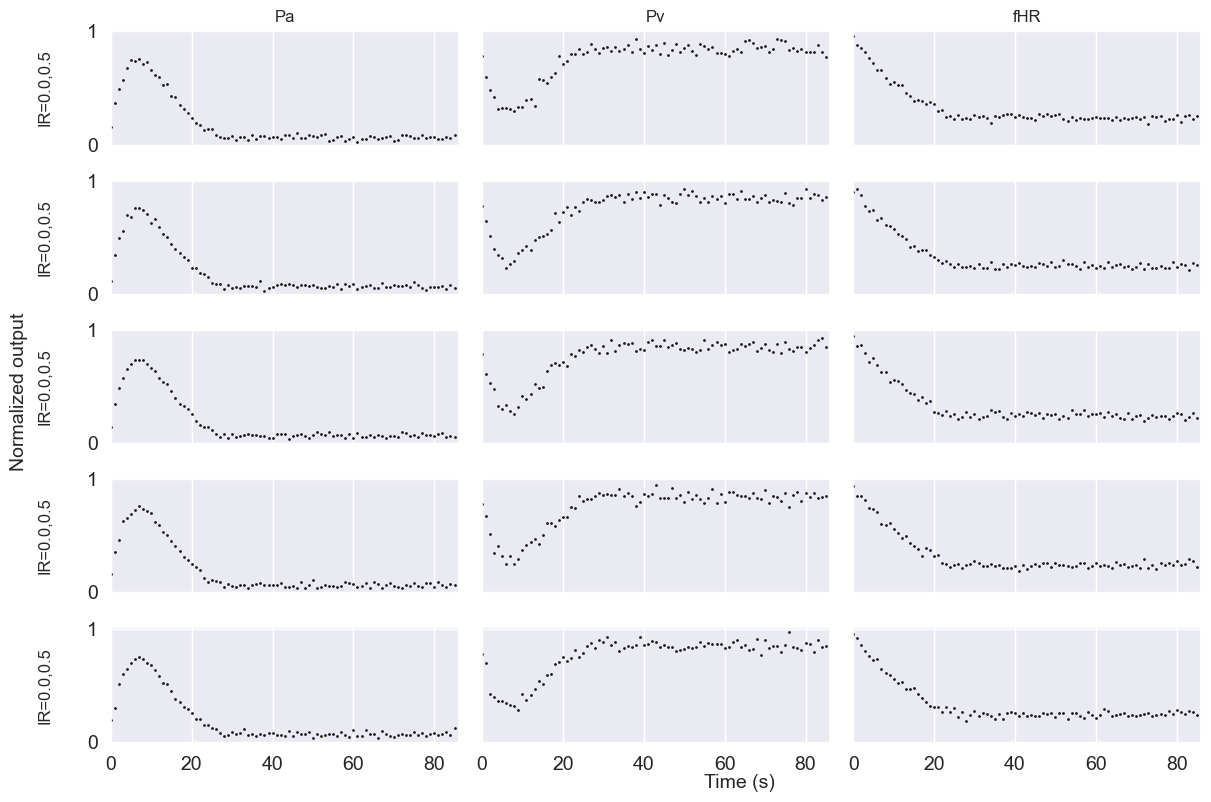

In [43]:
columns = np.arange(train_data.shape[1])
rows = np.arange(len(idx))
t = np.arange(0.0, stop=(args.seq_len) * args.delta_t, step=args.delta_t) 

colors = ['tab:gray', 'r', 'y', 'c']
fs = 14
nplots = 5
rows = rows[0:nplots]
idx = idx[0:nplots]
plt.clf()
fig, axs = plt.subplots(len(rows), len(columns), sharex=True, sharey=True, figsize=(12, 8))
mesh = np.array(np.meshgrid(rows, columns))
combinations = mesh.T.reshape(-1, 2)

for r, c in combinations:
    loc = idx[r]
    empirical = train_data[loc, c, :]

    axs[r, c].plot(t, empirical, 'k.', markersize=2)
    axs[r, c].set_xlim(0.0, len(t) + 0.01)
    axs[r, c].set_ylim(-0.01, 1.01)
    axs[r, c].set_xticks([0, 20, 40, 60, 80])
    axs[r, c].tick_params(axis='both', which='major', labelsize=fs)

cols = ['Pa', 'Pv', 'fHR']
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

rows = ["IR={},{}".format(row[0], row[1]) for row in zip(iext[idx], rtpr[idx])]
print(rows)
for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, labelpad=25, fontsize=fs - 2)

fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs)
fig.text(0.6, 0, "Time (s)", ha="center", va="bottom", fontsize=fs)
#plt.ylabel("Normalized output", fontsize=fs)
#plt.xlabel("Time (h)", fontsize=fs)
fig.tight_layout()
plt.show()

